# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.10 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        #print(actions.shape)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677


In [6]:
from workspace_utils import keep_awake
!pip install progressbar

  Running setup.py bdist_wheel for progressbar ... done
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built progressbar


In [8]:
from agent import Agent 
import torch
agents = Agent(state_size=state_size, action_size=action_size, random_seed=10)
print(state_size)
print(action_size)

DDPG Agent hyperparameters:
	batch size: 		 1000000
	buffer size: 		 1000000
	discount / gamma: 	   0.990
	actor learning rate: 	   0.001
	critic learning rate: 	   0.001
	soft update / tau: 	   0.001
	noise decay rate: 	   0.999
	
Actor network built: ModuleList(
  (0): Linear(in_features=24, out_features=400, bias=True)
  (1): Linear(in_features=400, out_features=300, bias=True)
  (2): Linear(in_features=300, out_features=2, bias=True)
)
Actor network built: ModuleList(
  (0): Linear(in_features=24, out_features=400, bias=True)
  (1): Linear(in_features=400, out_features=300, bias=True)
  (2): Linear(in_features=300, out_features=2, bias=True)
)
Critic network built: ModuleList(
  (0): Linear(in_features=24, out_features=400, bias=True)
  (1): Linear(in_features=402, out_features=300, bias=True)
  (2): Linear(in_features=300, out_features=1, bias=True)
)
Critic network built: ModuleList(
  (0): Linear(in_features=24, out_features=400, bias=True)
  (1): Linear(in_features=402, out_fea

In [9]:
def MADDGP(env,number_of_episodes= 4000,SuccessCriteria = 0.50):

    # training loop
    # show progressbar
    import progressbar as pb
    widget = ['episode: ', pb.Counter(),'/',str(number_of_episodes),' ',
              pb.Percentage(), ' ', pb.ETA(), ' ', pb.Bar(marker=pb.RotatingMarker()), ' ' ]

    #timer = pb.ProgressBar(widgets=widget, maxval=number_of_episodes).start()
    print_every = 100
    #init scores
    scores = []
    average_score =[]
    agent_scores = []
    top_score = -10.0
    
    # use keep_awake to keep workspace from disconnecting
    for episode in keep_awake(range(0, number_of_episodes, 1)):

#         timer.update(episode)
        states = env.reset(train_mode=True)[brain_name].vector_observations
        agents.noise.reset()
        scores_per_episode = np.zeros(num_agents)

        while True:
            #print('hi')
            actions = agents.act(states)
            env_info = env.step(actions)[brain_name]

            rewards = env_info.rewards
            next_states = env_info.vector_observations
            dones = env_info.local_done

            agents.step(states[0], actions[0], rewards[0], next_states[0], dones[0])
            agents.step(states[1], actions[1], rewards[1], next_states[1], dones[1])


            states = next_states
            scores_per_episode += rewards
            if np.any(dones):
                break
        
        #Update scores
        scores.append(scores_per_episode.max())
        average_score.append(np.mean(scores[-100:]))
        agent_scores.append(scores_per_episode)
        if episode%print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f} \tAgent1 {} \tAgent2 {}'.format(episode, average_score[-1].mean(),  scores[-1],scores_per_episode[0],scores_per_episode[1]))

        if np.mean(scores) > top_score:
            torch.save(agents.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agents.critic_local.state_dict(), 'checkpoint_critic.pth')
            top_score = np.mean(scores)


        if  average_score[-1].mean() >= SuccessCriteria:
            print('\nEnvironment solved in {:d} episodes\tAverage Score: {:.2f}'.format(episode, average_score[-1].mean()))
            torch.save(agents.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agents.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
#     timer.finish()
    return scores ,average_score , agent_scores

scores, average_score, agent_scores = MADDGP(env,number_of_episodes=6000)

Episode 0	Average Score: 0.00	Score: 0.00 	Agent1 -0.009999999776482582 	Agent2 0.0
Episode 100	Average Score: 0.01	Score: 0.00 	Agent1 -0.009999999776482582 	Agent2 0.0
Episode 200	Average Score: 0.01	Score: 0.10 	Agent1 -0.009999999776482582 	Agent2 0.10000000149011612
Episode 300	Average Score: 0.07	Score: 0.10 	Agent1 0.10000000149011612 	Agent2 -0.009999999776482582
Episode 400	Average Score: 0.04	Score: 0.09 	Agent1 0.0 	Agent2 0.09000000171363354
Episode 500	Average Score: 0.08	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 600	Average Score: 0.17	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582
Episode 700	Average Score: 0.11	Score: 0.00 	Agent1 0.0 	Agent2 -0.009999999776482582

Environment solved in 787 episodes	Average Score: 0.50


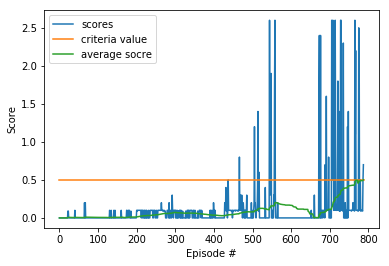

In [13]:
plt.plot(np.arange(len(scores)),scores) 

plt.plot([0,len(scores)],[0.5,0.5])  #criteria value
plt.plot(np.arange(len(scores)),average_score)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(['scores','criteria value','average socre'])
plt.show()

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 